In [29]:
%pip install gdown

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gdown

file_id = '1rliGZ-tW5xV0SvFsZ6lyQccwWPnhe2wG'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'loan_data.csv'

gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1rliGZ-tW5xV0SvFsZ6lyQccwWPnhe2wG
To: c:\Users\hp\OneDrive\Desktop\credit_scoring model\loan_data.csv
100%|██████████| 52.4k/52.4k [00:00<00:00, 364kB/s]


'loan_data.csv'

In [31]:
import pandas as pd
df = pd.read_csv('loan_data.csv')
df.head(10)


,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0
5,NaN,18244.339419,36,1.0,0
6,NaN,23366.013955,60,1.0,1
7,65813.825125,8742.153888,60,1.0,0
8,43549.461053,26035.434321,36,1.0,1
9,61766.080785,18514.114056,60,1.0,0


In [32]:
df.shape

(1248, 5)

In [33]:
df.columns.tolist()

['income', 'loan_amount', 'term', 'credit_history', 'defaulted']

In [34]:
df.dtypes

income            float64
loan_amount       float64
term                int64
credit_history    float64
defaulted           int64
dtype: object

In [35]:
df.isnull().sum()

income            120
loan_amount       122
term                0
credit_history    112
defaulted           0
dtype: int64

In [36]:
df.fillna({'income':df['income'].median()}, inplace=True)
df.fillna({'loan_amount':df['loan_amount'].median()}, inplace=True)

In [37]:
df.fillna({'credit_history':df['credit_history'].mode()[0]}, inplace=True)

In [38]:
df.isnull().sum()

income            0
loan_amount       0
term              0
credit_history    0
defaulted         0
dtype: int64

In [39]:
df.describe()

,income,loan_amount,term,credit_history,defaulted
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,52500.945298,16167.787505,48.000000,0.771635,0.414263
std,16967.161028,5541.521139,12.004811,0.419948,0.492792
min,8000.000000,1000.000000,36.000000,0.000000,0.000000
25%,41673.912889,12772.722413,36.000000,1.000000,0.000000
50%,52462.564119,16052.247335,48.000000,1.000000,0.000000
75%,62987.634437,19610.211517,60.000000,1.000000,1.000000
max,121349.166832,35158.645407,60.000000,1.000000,1.000000


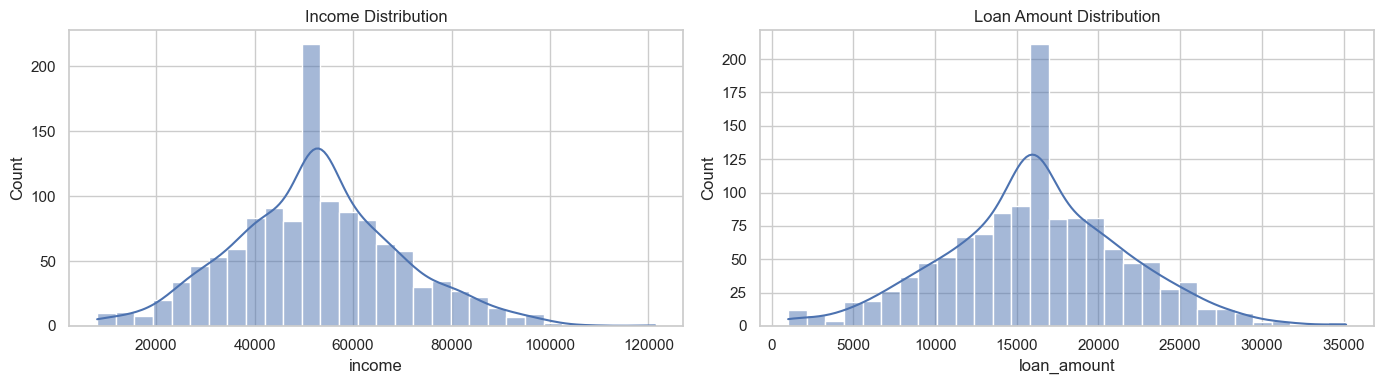

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set(style="whitegrid")

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df['income'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Income Distribution")

sns.histplot(df['loan_amount'], kde=True, bins=30, ax=axes[1])
axes[1].set_title("Loan Amount Distribution")

plt.tight_layout()
plt.show()

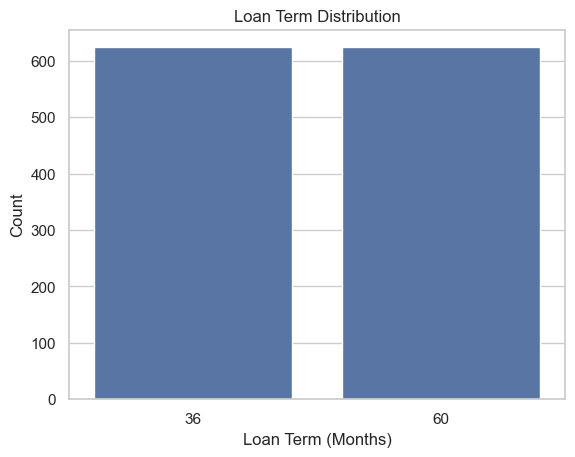

In [41]:
sns.countplot(x='term', data=df)
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Count")
plt.show()


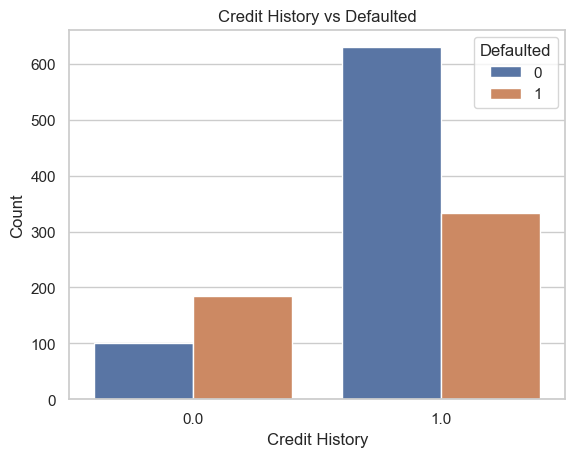

In [42]:
sns.countplot(x='credit_history', hue='defaulted', data=df)
plt.title("Credit History vs Defaulted")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title='Defaulted')
plt.show()

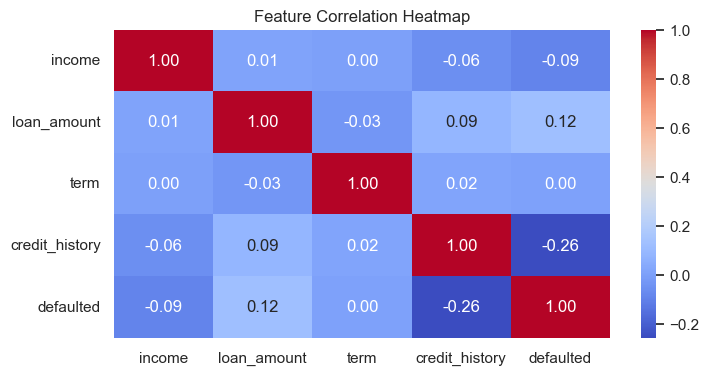

In [43]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [44]:
# Binary encoding: 0 for 36 months, 1 for 60 months
df['term_binary'] = df['term'].apply(lambda x: 1 if x == 60 else 0)

In [45]:
import numpy as np
# Log-transform skewed features
df['log_income'] = np.log1p(df['income'])
df['log_loan_amount'] = np.log1p(df['loan_amount'])

In [46]:
# let's first see the features
list(df.columns)

['income',
 'loan_amount',
 'term',
 'credit_history',
 'defaulted',
 'term_binary',
 'log_income',
 'log_loan_amount']

In [47]:
features = ['log_income', 'log_loan_amount', 'term_binary', 'credit_history']
target = 'defaulted'

In [48]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
# Define scaling features
scale_features = ['log_income', 'log_loan_amount']
# Fit the scaler to our dataset
df[scale_features] = scaler.fit_transform(df[scale_features])

df.head()

,income,loan_amount,term,credit_history,defaulted,term_binary,log_income,log_loan_amount
0,60940.854754,17402.715471,60,1.0,1,1,0.555865,0.335135
1,49511.242579,6664.626123,36,0.0,0,0,0.010029,-1.753786
2,63658.393686,17985.281393,60,0.0,1,1,0.670515,0.406800
3,79414.537415,21001.173770,36,1.0,0,0,1.251689,0.744209
4,47785.239255,4037.586145,36,1.0,0,0,-0.083218,-2.844410


In [49]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df[features]
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [50]:
# Import Required classess from sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [51]:
#  Define Classifier Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [52]:
# Train and Evaluate Each Model

for name, model in models.items():
    # Display the Current Model Name

    print(f"\nModel: {name}")
    
    # Build pipeline (scaling already applied to X)
    pipeline = Pipeline([
        # You can specify the StandardScaler() if not,
        ('classifier', model)
    ])
    
    # Fit model
    pipeline.fit(X_train, y_train)
    
    # Make Prediction
    y_pred = pipeline.predict(X_test)
    
    # Evaluate model accuracy
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.6680
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       143
           1       0.69      0.40      0.51       107

    accuracy                           0.67       250
   macro avg       0.68      0.63      0.63       250
weighted avg       0.67      0.67      0.65       250


Model: Decision Tree
Accuracy: 0.5320
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       143
           1       0.45      0.42      0.43       107

    accuracy                           0.53       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.53      0.53      0.53       250


Model: Random Forest
Accuracy: 0.6080
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       143
           1       0.55      0.49      0.51  